# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
# Number of Marketing Campaigns = 17

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd

In [3]:
# Read file and store in df
# df = pd.read_csv(r'C:\Users\viksaraw\OneDrive\Berkeley\Module 17\module17_starter (2)\data\bank-additional-full.csv', sep=';')
df = pd.read_csv(r'C:\Users\vsaraw538\Desktop\Module 17\data\bank-additional-full.csv', sep=';')



In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
#   Business Objective: Develop a predictive model to determine the likelihood of a client subscribing to a deposit
#   Purpose: Improve the effectiveness of marketing campaign
#   Key Benefits:
#       Identify the main factors that influence a successful client contact
#       Optimize the use of available resources such as:
#            Human effort
#            Phone calls
#            Time
#   Enable better targeting by selecting a high-quality, cost-effective group of potential customers


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [7]:
# Data Quality and Data Understanding

In [8]:
# Null/missing Data check

Null_Count = df.isnull().sum()
Null_Count

# Result - No missing values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
# Check Duplicates

df[df.duplicated()]

# There are 12 records as duplicate, I will remove them

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [10]:
# Dropping Duplicates

df = df.drop_duplicates()


In [11]:
# Dropping duration as I will build predictive models
df = df.drop(columns = 'duration')



In [12]:
# Find and display unique values for each column to check there is any uncommon value which needs to be handled

unique_values = {col: df[col].unique().tolist() for col in df.columns}

# Print the unique )values
for column, values in unique_values.items():
    print(f"Unique values in column '{column}': {values}")

# Analysis 1 - Many columns has "unknown" as values
# Analysis 2-  pdays has 999 which is uncommon to the other values
# Analysis 3- 'emp.var.rate': has both positive and negative values
# Analysis 4- 'cons.price.idx' : has both positive and negative values

# Based upon the unique values for each column we need to do encoding, below are the columns selected for One hot and ordinal encoding

# One hot encoding: job,  marital, education, default, housing, loan, contact, poutcome
# Ordinal Encoding: education, month, day of the week


Unique values in column 'age': [56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]
Unique values in column 'job': ['housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'retired', 'management', 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']
Unique values in column 'marital': ['married', 'single', 'divorced', 'unknown']
Unique values in column 'education': ['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate']
Unique values in column 'default': ['no', 'unknown', 'yes']
Unique values in column 'housing': ['no', 'yes', 'unknown']
Unique values in column 'loan': ['no', 'yes', 'unknown']
Unique values in column 'contact': ['telephone', 'c

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [13]:
# this block needs to be merged at the top cell

# import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn import set_config

In [14]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(df.drop('y',axis =1), df['y'], test_size =0.20, random_state =42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [15]:
# Encoding - all categorical columns

# Apply One hot encoding to the columns [job,  marital, education, default, housing, loan, contact, poutcome]
# Apply Ordinal encoding to columns [education, month, day of the week]

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Specify categorical columns to encode

one_hot_features = ['job',  'marital', 'default', 'housing', 'loan', 'contact', 'poutcome']
ordinal_features = ['education', 'month', 'day_of_week']
other_features   = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

ordinal_categories = [
    ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',
     'professional.course', 'university.degree', 'unknown'],
    ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
    ['mon', 'tue', 'wed', 'thu', 'fri']
]

# Define  transformers
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot',  OneHotEncoder(), one_hot_features),  # One-hot encode categorical columns
        ('encoder', OrdinalEncoder(categories = ordinal_categories), ordinal_features) # ordinal encoding
    ],
    remainder='passthrough'  # Keep numerical columns unchanged
)

# Create a pipeline
pipeline = Pipeline([('preprocessor', column_transformer)])

# Transform X_train and X_test
df_transformed_X_train = pipeline.fit_transform(X_train)
df_transformed_X_test  = pipeline.transform(X_test)


# Get one hot encoded feature names
encoded_columns_onehot = pipeline.named_steps['preprocessor'].named_transformers_['onehot'].get_feature_names_out(one_hot_features)

# print(encoded_columns_onehot)
encoded_columns = list(encoded_columns_onehot) + ordinal_features + other_features

df_encoded_X_train = ''
df_encoded_X_test = ''

# Combine encoded categorical columns with original numerical columns and ordinal columns
df_encoded_X_train = pd.DataFrame(df_transformed_X_train, columns=encoded_columns)
df_encoded_X_test  = pd.DataFrame(df_transformed_X_test, columns=encoded_columns)


In [16]:
# Validate result

# df_encoded_X_train.head(5)
df_encoded_X_test.head(5)

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,day_of_week,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,59.0,1.0,999.0,0.0,-2.9,92.963,-40.8,1.266,5076.2
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,34.0,1.0,999.0,1.0,-1.8,92.893,-46.2,1.299,5099.1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,32.0,2.0,999.0,0.0,-1.1,94.601,-49.5,0.959,4963.6
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,53.0,2.0,999.0,1.0,-1.8,92.893,-46.2,1.299,5099.1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,24.0,1.0,999.0,0.0,1.4,93.918,-42.7,4.963,5228.1


In [17]:
# Selective Scaling only the columns which are non binary

from sklearn.preprocessing import StandardScaler
columns_to_scale = ['education', 'month', 'day_of_week','age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
scaler = StandardScaler()

# Scale Training and Test Data

X_train_scaled = df_encoded_X_train.copy()
X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train_scaled[columns_to_scale])


X_test_scaled = df_encoded_X_test.copy()
X_test_scaled[columns_to_scale] = scaler.transform(X_test_scaled[columns_to_scale])



In [18]:
# Validation
X_test_scaled.head(5)

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,day_of_week,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.404211,1.817564,-0.566100,0.195697,-0.348601,-1.900745,-1.060690,-0.060187,-1.358395,-1.255426
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.404211,-0.579095,-0.566100,0.195697,1.675176,-1.199927,-1.181648,-1.227566,-1.339365,-0.939011
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.014863,-0.770828,-0.206973,0.195697,-0.348601,-0.753952,1.769746,-1.940965,-1.535429,-2.811247
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.404211,1.242366,-0.206973,0.195697,1.675176,-1.199927,-1.181648,-1.227566,-1.339365,-0.939011
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.014863,-1.537759,-0.566100,0.195697,-0.348601,0.838815,0.589534,-0.470932,0.773502,0.843413


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [19]:
# Convert target variable to binary 

y_train = y_train.map({'yes':1, 'no':0})
y_test = y_test.map({'yes':1, 'no':0})

In [20]:
# logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    roc_auc_score, log_loss, confusion_matrix, classification_report, roc_curve,
    mean_absolute_error, mean_squared_error, r2_score
)


# Train logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict and evaluate

y_train_pred = model.predict(X_test_scaled)
y_test_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]




### Problem 9: Score the Model

What is the accuracy of your model?

Accuracy: 0.8930305973773677
Recall: 0.1874356333676622
Precision: 0.6642335766423357
F1 Score: 0.2923694779116466
ROC AUC Score: 0.7778965073150264
Log Loss: 0.2915296940601882
Mean Absolute Error: 0.10696940262263234
Mean Squared Error: 0.10696940262263234
R2 Score: -0.028578394925659056


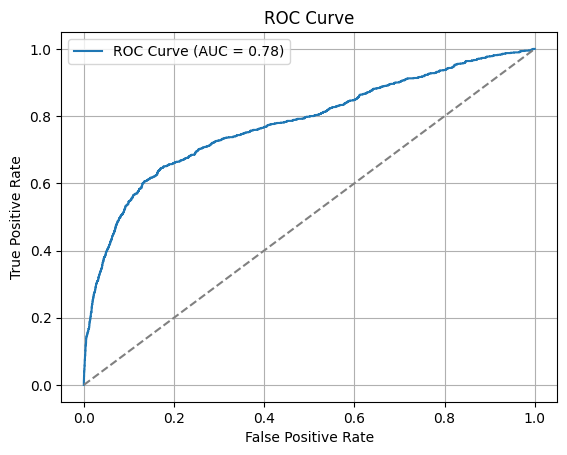

In [21]:
# Calculate metrics
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("Log Loss:", log_loss(y_test, y_proba))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_test_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred))
print("R2 Score:", r2_score(y_test, y_test_pred))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [22]:
# KNN Model

from sklearn.neighbors import KNeighborsClassifier


# Train and fitKNN regression model
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)


# Predict probabilities and classes
y_test_pred_knn = model_knn.predict(X_test_scaled)
y_proba_knn= model_knn.predict_proba(X_test_scaled)[:, 1]


Accuracy: 0.8892666342884895
Recall: 0.28527291452111225
Precision: 0.5595959595959596
F1 Score: 0.37789904502046384
ROC AUC Score: 0.7052044741410044
Log Loss: 1.8018327550428233
Mean Absolute Error: 0.11073336571151045
Mean Squared Error: 0.11073336571151045
R2 Score: -0.06477127828853702


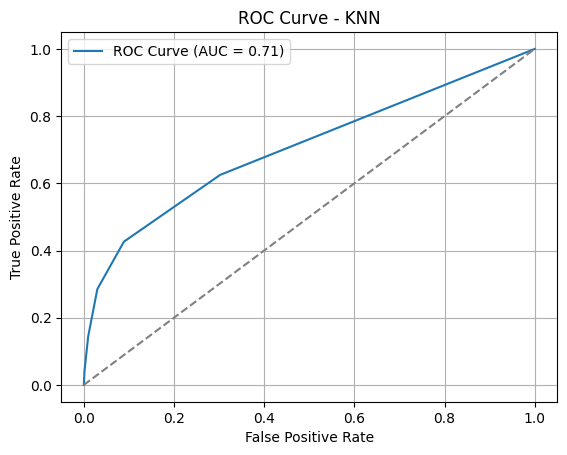

In [23]:
# Calculate metrics

print("Accuracy:", accuracy_score(y_test, y_test_pred_knn))
print("Recall:", recall_score(y_test, y_test_pred_knn))
print("Precision:", precision_score(y_test, y_test_pred_knn))
print("F1 Score:", f1_score(y_test, y_test_pred_knn))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_knn))
print("Log Loss:", log_loss(y_test, y_proba_knn))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_test_pred_knn))
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred_knn))
print("R2 Score:", r2_score(y_test, y_test_pred_knn))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba_knn):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier


# Train and Decision Tree  model
model_dcsn = DecisionTreeClassifier(random_state=42)
model_dcsn.fit(X_train_scaled, y_train)


# Predict probabilities and classes
y_test_pred_dcsn = model_dcsn.predict(X_test_scaled)
y_proba_dcsn= model_dcsn.predict_proba(X_test_scaled)[:, 1]




Accuracy: 0.8349927149101506
Recall: 0.32852729145211124
Precision: 0.310916179337232
F1 Score: 0.3194792188282424
ROC AUC Score: 0.6180225152973747
Log Loss: 5.88315124937432
Mean Absolute Error: 0.16500728508984944
Mean Squared Error: 0.16500728508984944
R2 Score: -0.5866493061339055


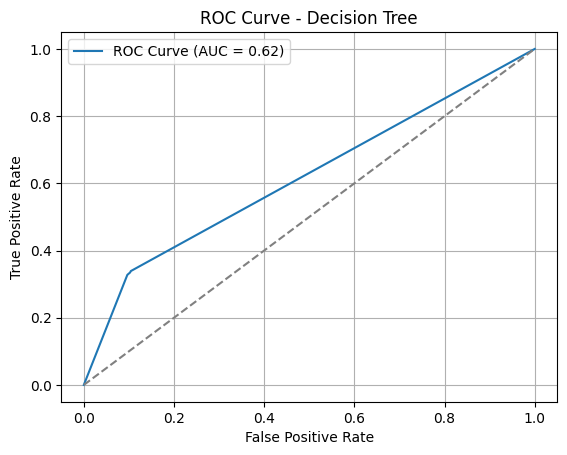

In [25]:
# Calculate metrics
print("Accuracy:", accuracy_score(y_test, y_test_pred_dcsn))
print("Recall:", recall_score(y_test, y_test_pred_dcsn))
print("Precision:", precision_score(y_test, y_test_pred_dcsn))
print("F1 Score:", f1_score(y_test, y_test_pred_dcsn))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_dcsn))
print("Log Loss:", log_loss(y_test, y_proba_dcsn))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_test_pred_dcsn))
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred_dcsn))
print("R2 Score:", r2_score(y_test, y_test_pred_dcsn))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_dcsn)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba_dcsn):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# SVM
from sklearn.svm import SVC


# Train and SVM Classifier model
model_svm = SVC( probability=True, random_state=42)
model_svm.fit(X_train_scaled, y_train)


# Predict probabilities and classes
y_test_pred_svm = model_svm.predict(X_test_scaled)
y_proba_svm= model_svm.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# Calculate metrics
print("Accuracy:", accuracy_score(y_test, y_test_pred_svm))
print("Recall:", recall_score(y_test, y_test_pred_svm))
print("Precision:", precision_score(y_test, y_test_pred_svm))
print("F1 Score:", f1_score(y_test, y_test_pred_svm))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_svm))
print("Log Loss:", log_loss(y_test, y_proba_svm))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_test_pred_svm))
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred_svm))
print("R2 Score:", r2_score(y_test, y_test_pred_svm))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_svm)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba_svm):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_svm)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba_svm):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Compare metrics for all the models

# Create a dictionary with the data for all models
data = {
    "Model": ["KNN", "Decision Tree", "SVM", "Logistic Regression"],
    "Accuracy": [0.8869871327992231, 0.8328477785870357, 0.8970373967945605, 0.8930305973773677],
    "Recall": [0.27593582887700535, 0.3251336898395722, 0.23274974253347064, 0.1874356333676622],
    "Precision": [0.50390625, 0.2895238095238095, 0.6869300911854104, 0.6642335766423357],
    "F1 Score": [0.3565998617829993, 0.3062972292191436, 0.3476923076923077, 0.2923694779116466],
    "ROC AUC Score": [0.7107892807951609, 0.6137275648934839, 0.6819480700819286, 0.7778965073150264],
    "Log Loss": [1.7566005873056867, 5.9820414683326515, 0.32038088877294346, 0.2915296940601882],
    "Mean Absolute Error": [0.11301286720077688, 0.16715222141296432, 0.10296260320543954, 0.10696940262263234],
    "Mean Squared Error": [0.11301286720077688, 0.16715222141296432, 0.10296260320543954, 0.10696940262263234],
    "R2 Score": [-0.12320378190487946, -0.6612799223233288, 0.009949513170307678, -0.028578394925659056]
}

# Create a DataFrame
df_metrices = pd.DataFrame(data)

# Display the DataFrame
print(df_metrices)

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [ ]:
# Feature Exploration
# Many features can be removed, I can do Correlation Matrix to check correlation coefficients, can also run the Decision Tree, and XBoost models
# to get the best features

In [ ]:
# Create a countplot to visualize the impact of 'marital' on 'y'

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='marital', hue='y')
plt.title('Impact of Marital Status on Outcome (y)')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Feature importance using CatBoost Classifier

from catboost import CatBoostClassifier, Pool


# Define categorical features
cat_features = ['job',  'marital', 'default', 'housing', 'loan', 'contact', 'poutcome', 'education', 'month', 'day_of_week']


# Split features and target
X_cat = df.drop('y', axis=1)
y_cat = df['y']


# Initialize CatBoostClassifier
model = CatBoostClassifier(verbose=0)


# Fit model
model.fit(X_cat, y_cat, cat_features=cat_features)


# Get feature importance
importances = model.get_feature_importance(prettified=True)
print(importances)

In [ ]:
# Hyper parameter Tuning
# Using Gridsearch CV on logistic Regression to check on best param

from sklearn.model_selection import GridSearchCV, train_test_split

# Define model
logreg = LogisticRegression(max_iter=1000)


# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}


# Grid search with 5-fold cross-validation
grid = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

# Evaluate on test set
y_pred = grid.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


In [ ]:
# # Hyper parameter Tuning
# Using Gridsearch CV on KNN to check on best param



from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

# Define hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


# Grid search with 5-fold cross-validation
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)


# Best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)


# Evaluate on test set
y_pred_test_knn_cv = grid.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_knn_cv))


In [ ]:
# # Hyper parameter Tuning
# Using Gridsearch CV on Decision Tree to check on best param


dt = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Grid search with 5-fold cross-validation
grid = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)


# Best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

# Evaluate on test set
y_pred_gridcv_dcsn = grid.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred_gridcv_dcsn))


In [ ]:
# # Hyper parameter Tuning
# Using Gridsearch CV on SVM to check on best param



from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define model
svm = SVC()

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # Only relevant for 'poly' kernel
}



# Grid search with 5-fold cross-validation
grid = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)



# Best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

# Evaluate on test set
y_pred_gridcv_svm = grid.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred_gridcv_svm))


##### Questions